In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
# Fitting Polynomial Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [2]:
df1 = pd.read_csv('data.csv')
df1.head()

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect
0,64.13,2058.81,2.53,1307.94,5815.68,21.06,4.1099,0.7434,0.4052
1,68.21,1883.68,2.73,610.06,6343.57,9.71,0.9330,0.7421,0.4044
2,45.27,948.74,3.90,480.06,6251.32,23.71,4.1899,0.7915,0.3997
3,66.97,2036.34,15.26,700.38,7795.69,61.04,1.6463,0.9139,0.3991
4,67.21,1340.54,10.36,1209.46,123.96,20.47,2.1917,0.8877,0.3980


In [3]:
X = df1.iloc[:,1:7].values
y = df1.iloc[:,8].values
X = StandardScaler().fit_transform(X)

In [4]:
# Transform our x input to 1, x and x^2
pre_process = PolynomialFeatures(degree=2)
X_poly = pre_process.fit_transform(X)
# Show the transformation on the notebook
X_poly

array([[ 1.        ,  1.10367146, -1.03139791, ...,  0.6253882 ,
        -1.06581786,  1.81642014],
       [ 1.        ,  0.77149069, -0.99128895, ...,  1.5127309 ,
         2.25688137,  3.36709821],
       [ 1.        , -1.00187251, -0.7566515 , ...,  0.47374302,
        -0.98280414,  2.03887747],
       ...,
       [ 1.        ,  1.53622914, -1.23795908, ...,  1.69593077,
        -1.293944  ,  0.98724023],
       [ 1.        ,  0.37392836, -0.85291302, ...,  0.50788967,
        -0.74201593,  1.08406938],
       [ 1.        ,  1.22553873, -0.93313095, ...,  0.87005092,
         0.40433209,  0.18790215]])

In [5]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.1, random_state=4)

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)
#model.fit(X_poly,y)

LinearRegression()

In [7]:
#y_pred = model.predict(X_poly)
y_pred = model.predict(X_test)
#print(predictions[0:5]),print(y_test[0:5])

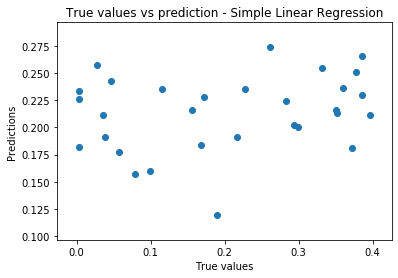

In [8]:
#To make predictions on the test data
plt.title('True values vs prediction - Simple Linear Regression')
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()

In [9]:
print("Score:", model.score(X_test,y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score: 0.05121535103197827
Mean Absolute Error: 0.11700042456160355
Mean Squared Error: 0.017874916150075023
Root Mean Squared Error: 0.13369710598990175


In [10]:
# print("Score:", model.score(X_poly, y_pred))
# from sklearn import metrics
# from sklearn.metrics import mean_squared_error, r2_score
# print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
# r2 = r2_score(y,y_pred)
# print('R2 score:',r2)

In [11]:
df2 = pd.read_csv('fake_data2.csv', index_col = False)
df2.head()

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.
0,53.3549,1105.1310,12.8663,1378.9315,2812.6157,75.6442,3.3628,0.7205
1,72.2534,1026.3148,3.4239,1028.7463,919.9169,44.2063,3.8679,0.8940
2,65.0794,722.9642,6.2303,2017.9195,1212.4212,17.5518,2.3552,0.7661
3,60.7060,1557.2321,11.7114,558.2210,1716.0908,65.7869,1.7253,0.7738
4,46.1874,1304.4192,8.5750,1280.4693,1929.2197,37.4468,1.8327,0.7611


In [14]:
X2 = df2.iloc[:,1:7]
X2 = X2.values
X2 = StandardScaler().fit_transform(X2)
X2_poly = pre_process.fit_transform(X2)

In [15]:
df2['CR-corrosion defect'] = model.predict(X2_poly)


In [16]:
df2.to_csv('fake_data_predicted.csv', index =False)

In [17]:
df1

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect
0,64.13,2058.81,2.53,1307.94,5815.68,21.06,4.1099,0.7434,0.4052
1,68.21,1883.68,2.73,610.06,6343.57,9.71,0.9330,0.7421,0.4044
2,45.27,948.74,3.90,480.06,6251.32,23.71,4.1899,0.7915,0.3997
3,66.97,2036.34,15.26,700.38,7795.69,61.04,1.6463,0.9139,0.3991
4,67.21,1340.54,10.36,1209.46,123.96,20.47,2.1917,0.8877,0.3980
...,...,...,...,...,...,...,...,...,...
287,56.81,2242.44,1.71,1470.60,5929.47,14.83,2.0084,0.7927,0.0031
288,47.46,2243.44,2.42,727.07,4184.95,37.04,2.5155,0.7695,0.0027
289,54.03,2286.86,1.50,967.96,4900.59,7.84,3.7564,0.8991,0.0027
290,45.69,1674.08,3.42,1312.84,3476.96,23.08,3.8039,0.7940,0.0022


In [18]:
df2

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect
0,53.3549,1105.1310,12.8663,1378.9315,2812.6157,75.6442,3.3628,0.7205,0.224459
1,72.2534,1026.3148,3.4239,1028.7463,919.9169,44.2063,3.8679,0.8940,0.226169
2,65.0794,722.9642,6.2303,2017.9195,1212.4212,17.5518,2.3552,0.7661,0.230531
3,60.7060,1557.2321,11.7114,558.2210,1716.0908,65.7869,1.7253,0.7738,0.230334
4,46.1874,1304.4192,8.5750,1280.4693,1929.2197,37.4468,1.8327,0.7611,0.220249
...,...,...,...,...,...,...,...,...,...
9995,69.2011,2079.2813,16.7139,1605.8382,5812.9489,86.2421,2.8301,0.7822,0.188970
9996,70.5083,472.6720,13.1748,1626.3832,2138.2500,33.3969,4.1051,0.7938,0.210857
9997,72.1220,969.7821,0.5668,657.2762,6986.5283,27.2857,4.0120,0.7954,0.186727
9998,54.1076,1239.9707,7.1714,979.8507,4872.2828,36.4382,1.4042,0.7397,0.207404


In [19]:
df1.describe()

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,59.882979,1476.940137,7.672979,1022.484760,4232.614281,41.500479,2.764615,0.825091,0.210450
std,8.689875,528.118015,4.994977,544.609518,2763.672374,25.891736,0.999888,0.063128,0.121707
min,41.070000,382.080000,0.230000,129.470000,40.610000,0.130000,0.678600,0.711100,0.000900
25%,52.762500,1039.450000,3.282500,562.817500,1833.500000,18.042500,1.996850,0.772075,0.107625
50%,61.920000,1546.675000,6.905000,998.915000,3671.875000,39.955000,2.887850,0.829150,0.222400
75%,66.637500,1913.565000,11.752500,1455.182500,6845.135000,64.170000,3.561775,0.879225,0.316375
max,73.870000,2317.230000,17.540000,2087.430000,9314.260000,89.260000,4.298200,0.931900,0.405200


In [20]:
df2.describe()

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,57.278434,1358.420991,8.885873,1105.930855,4648.351030,44.975277,2.494923,0.821329,0.211309
std,9.434268,559.828350,4.964054,565.839849,2682.720225,25.699859,1.041236,0.063142,0.031615
min,41.070400,382.385300,0.230800,129.480800,40.765200,0.130800,0.679600,0.711100,0.060391
25%,49.149575,873.503225,4.622350,612.806650,2305.905075,23.032500,1.597600,0.766700,0.192802
50%,57.224950,1361.066150,8.920800,1108.509200,4619.170400,45.237800,2.503700,0.821300,0.213439
75%,65.342250,1845.980775,13.120325,1592.293725,7000.271350,67.284650,3.402275,0.876200,0.232222
max,73.860700,2317.084500,17.538300,2087.017600,9314.001700,89.254600,4.297200,0.931900,0.313659


In [25]:
df3 = df2.reset_index(drop=True)
df3

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect
0,53.3549,1105.1310,12.8663,1378.9315,2812.6157,75.6442,3.3628,0.7205,0.224459
1,72.2534,1026.3148,3.4239,1028.7463,919.9169,44.2063,3.8679,0.8940,0.226169
2,65.0794,722.9642,6.2303,2017.9195,1212.4212,17.5518,2.3552,0.7661,0.230531
3,60.7060,1557.2321,11.7114,558.2210,1716.0908,65.7869,1.7253,0.7738,0.230334
4,46.1874,1304.4192,8.5750,1280.4693,1929.2197,37.4468,1.8327,0.7611,0.220249
...,...,...,...,...,...,...,...,...,...
9995,69.2011,2079.2813,16.7139,1605.8382,5812.9489,86.2421,2.8301,0.7822,0.188970
9996,70.5083,472.6720,13.1748,1626.3832,2138.2500,33.3969,4.1051,0.7938,0.210857
9997,72.1220,969.7821,0.5668,657.2762,6986.5283,27.2857,4.0120,0.7954,0.186727
9998,54.1076,1239.9707,7.1714,979.8507,4872.2828,36.4382,1.4042,0.7397,0.207404


In [26]:
dataset = pd.concat([df3, df1], sort=False)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10292 entries, 0 to 291
Data columns (total 10 columns):
Wellhead Temp. (C)                         10292 non-null float64
Wellhead Press (psi)                       10292 non-null float64
MMCFD- gas                                 10292 non-null float64
BOPD (barrel of oil produced per day)      10292 non-null float64
BWPD (barrel of water produced per day)    10292 non-null float64
BSW - basic solid and water (%)            10292 non-null float64
CO2 mol. (%) @ 25 C & 1 Atm.               10292 non-null float64
Gas Grav.                                  10292 non-null float64
CR-corrosion defect                        10000 non-null float64
CR-corrosion defect                        292 non-null float64
dtypes: float64(10)
memory usage: 884.5 KB


In [28]:
dataset.head()

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect,CR-corrosion defect
0,53.3549,1105.1310,12.8663,1378.9315,2812.6157,75.6442,3.3628,0.7205,0.224459,NaN
1,72.2534,1026.3148,3.4239,1028.7463,919.9169,44.2063,3.8679,0.8940,0.226169,NaN
2,65.0794,722.9642,6.2303,2017.9195,1212.4212,17.5518,2.3552,0.7661,0.230531,NaN
3,60.7060,1557.2321,11.7114,558.2210,1716.0908,65.7869,1.7253,0.7738,0.230334,NaN
4,46.1874,1304.4192,8.5750,1280.4693,1929.2197,37.4468,1.8327,0.7611,0.220249,NaN


In [32]:
dataset.to_csv('final_data.csv', index=False)

In [33]:
df = pd.read_csv('final_data.csv')

In [34]:
df

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect,CR-corrosion defect
0,53.3549,1105.1310,12.8663,1378.9315,2812.6157,75.6442,3.3628,0.7205,0.224459,NaN
1,72.2534,1026.3148,3.4239,1028.7463,919.9169,44.2063,3.8679,0.8940,0.226169,NaN
2,65.0794,722.9642,6.2303,2017.9195,1212.4212,17.5518,2.3552,0.7661,0.230531,NaN
3,60.7060,1557.2321,11.7114,558.2210,1716.0908,65.7869,1.7253,0.7738,0.230334,NaN
4,46.1874,1304.4192,8.5750,1280.4693,1929.2197,37.4468,1.8327,0.7611,0.220249,NaN
...,...,...,...,...,...,...,...,...,...,...
10287,56.8100,2242.4400,1.7100,1470.6000,5929.4700,14.8300,2.0084,0.7927,NaN,0.0031
10288,47.4600,2243.4400,2.4200,727.0700,4184.9500,37.0400,2.5155,0.7695,NaN,0.0027
10289,54.0300,2286.8600,1.5000,967.9600,4900.5900,7.8400,3.7564,0.8991,NaN,0.0027
10290,45.6900,1674.0800,3.4200,1312.8400,3476.9600,23.0800,3.8039,0.7940,NaN,0.0022
